# BCGS Workshop - Data analysis

## Introduction

In this workshop you will have the opportunity and the time to actively explore some machine learning concepts. I do not know how much exposure you already had to details of machine learning or to python programming so we have to offer something for everybody.

All the material that I show you and the data that you need during the following hours is available on my GitHub page: https://github.com/markusroellig/BCGS-Seminar-28.05.2022. 

You can do the Python computations on your own machine with your own local Python installation. For those without a running Python system it is much easier to work on a Google CoLab notebook. You only need a Google account. Then go to https://colab.research.google.com/ and open the notebook that you downloaded from GitHub. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Topic 1 - PCA: Principal Component Analysis - Introduction<a id='PCA1'></a>

A nice introduction to PCA is a small example. Let's start with some data:

### 1)Get data

In [2]:
x=[2.5,.5,2.2,1.9,3.1,2.3,2.,1.,1.5,1.1]
y=[2.4,.7,2.9,2.2,3.,2.7,1.6,1.1,1.6,.9]

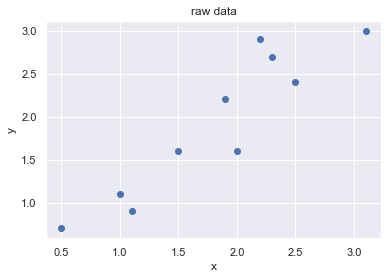

In [3]:
plt.scatter(x,y)

plt.title('raw data')
plt.xlabel('x')
plt.ylabel('y');

<div class="alert alert-block alert-warning">

#### Exercise

1. Plot $x$ vs. $y$.
2. Change frame label and plot label.
3. Change data point size and color.
4. Make the plot larger.
5. Plot with a different  aspect ration (heigt vs. width) e.g., of 1/2, 1 or 2.
    
</div>

### 2) Subtract mean

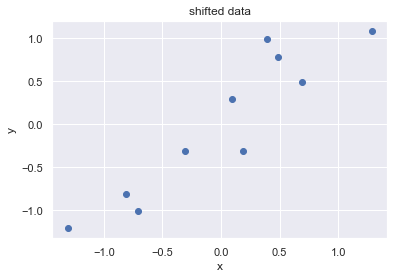

In [19]:
mean_x = np.mean(x)
mean_y = np.mean(y)

shifted_x = x - mean_x
shifted_y = y - mean_y

plt.scatter(shifted_x,shifted_y)
plt.title('shifted data')
plt.xlabel('x')
plt.ylabel('y');

<div class="alert alert-block alert-warning">

#### Exercise

1. Is there an easier way to compute the respective means? Look up the 'np.mean' command, especially the 'axis' keyword.
2. Subtract the median and compare the two subtracted datasets.
    
</div>

### 3) Calculate the covariance matrix

We can use numpy to compute the covariance matrix. We have to create a matrix from your $x$ and $y$ data.

In [21]:
dat=np.array([shifted_x,shifted_y])
dat

array([[ 0.69, -1.31,  0.39,  0.09,  1.29,  0.49,  0.19, -0.81, -0.31,
        -0.71],
       [ 0.49, -1.21,  0.99,  0.29,  1.09,  0.79, -0.31, -0.81, -0.31,
        -1.01]])

In [22]:
cov_mat=np.cov(dat)
cov_mat

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

Alternatively, we can also compute the covariance matrix directly. It has the form:

$
\left[\begin{array}{rr} 
\sigma_{x}^2 & \sigma_{yx} \\ 
\sigma_{xy} & \sigma_{y}^2 \\ 
\end{array}\right]$

where $\sigma_{x}^2$ is the variance of $x$, $\sigma_{y}^2$ is the variance of $y$ and $\sigma_{xy}$ is the covariance of $x$ w.r.t. $y$.

In [23]:
var_x=np.var(shifted_x)
var_x

0.5549000000000001

Wait! Why is this different from the value $0.61655556$ that we got from the built_in covariance function?

The reason is the difference between the sample and the population variance, i.e. we have to apply the Bessel correction $N/(N-1)$.

In [24]:
var_x=np.var(shifted_x) * 10/9
var_y=np.var(shifted_y) * 10/9

print (var_x,var_y)

0.6165555555555556 0.7165555555555554


Now to the covariance. cov(x,y) can be conveniently computed by 

$cov(x,y)=\frac{x.y}{N-1}$

if the mean values are both 0.

In [25]:
cov_xy=np.dot(shifted_x,shifted_y)/9
cov_xy

0.6154444444444445

In [26]:
cov_mat2=[[var_x,cov_xy],[cov_xy,var_y]]

cov_mat2==cov_mat

array([[ True,  True],
       [ True, False]])

In [27]:
cov_mat[1,1]-var_y

1.1102230246251565e-16

Except for the floating point accuracy, the two gave the same result. 

<div class="alert alert-block alert-warning">

#### Exercise

1. Write a general function that takes a matrix (dimension $\ge$ 2) and computes the covariance matrix. 
2. Expand your data to 3-D by adding a z vector (invent some data points).
  1. Plot the data in 3-D and some 2-D projections.
  2. Compute the $3\times3$ covariance matrix. 
    
</div>

### 3) Calculate the eigenvalues and eigenvectors of the covariance matrix

Note, the normalized (unit “length”) eigenvectors, such that the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i].

In [28]:
eigen_val,  eigen_vec = np.linalg.eig(cov_mat)
print (eigen_val)
print (eigen_vec)

[0.0490834  1.28402771]
[[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


Python returns the eigenvector corresponding to the first eigenvalue in the first column and so on...

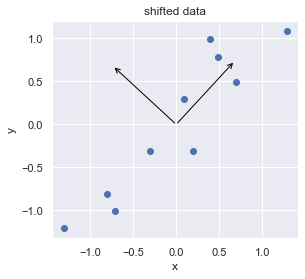

In [74]:
plt.scatter(shifted_x,shifted_y)
plt.gca().set_aspect('equal')
plt.title('shifted data')
plt.xlabel('x')
plt.ylabel('y')
plt.annotate("", xytext=(0, 0), xy=eigen_vec[:,0],  arrowprops=dict(edgecolor='black',arrowstyle="->"))
plt.annotate("", xytext=(0, 0), xy=-eigen_vec[:,1], arrowprops=dict(edgecolor='black',arrowstyle="->"));


In [17]:
print(eigen_vec[:,0],-eigen_vec[:,1])

[-0.73517866  0.6778734 ] [0.6778734  0.73517866]


Note, how the two eigenvectors are perpendicular and point along the two directions of increasing order of variability. In our case the data has the largest variability in direction of the second eigenvector (note that there is a +/- ambiguity in terms of the direction of the vector). The data scaters nost in that direction. The first eigenvector points in the direction of least (second-highest) variability. 

<div class="alert alert-block alert-warning">

#### Exercise

1. Test whether the eigenvectors are orthogonal.
2. What are the eigenvectors in your 3-D dataset?
3. Repeat the plot from this section in your 3-D case. 
    
</div>

### 4) Choose components and from feature vector

Sort the eigenvectors by their eigenvalue, highest to lowest. This gives you the components in order of significance. The eigenvector with the highest eigenvalue is the *principal component* of the data set. In our example, the eigenvector with the larges eigenvalue was the one that pointed down the middle of the data. It is the most significant relationship between the data dimensions.

Form the feature vector, which is a matrix of vectors, formed from the eigenvectors that you want to keep from the list of eigenvectors.

$\text{feature vector}=(eig_1,eig_2,...,eig_p)$

Given our example, we can either form a feature vector using both eigenvectors or we can choose to leave out the smaller, less significant component:

$
\left[\begin{array}{rr} 
 0.6778734 &  0.73517866& \\ 
 -0.73517866 & 0.6778734 &\\ 
\end{array}\right]$

or

$
\left[\begin{array}{r} 
0.6778734 \\ 
 0.73517866\\ 
\end{array}\right]$

**Note:** We form the row feature vector, where each row corresponds to a vector (in contrast to each column shwoing a vector). 

### 5) Derive the new data set

Once we have chosen the components (eigenvectors) that we wish to keep in our data and formed a feature vector, we simply take the transpose of the vector and multiply it on the left of the original data set, transposed.

$\text{final data}=\text{RowFeatureVector}\times\text{RowAdjustedData}$

where "RowFeatureVector" is the matrix with the eigenvectors in columns transposed, so that the eigenvectors are now in the rows with the most significant eigenvector at the top, "RowAdjustedData" is the mean adjusted data transposed, i.e. the data items are in each column, with each row holding a separate dimension.

In [33]:
print (dat)
print(mat)
print(np.dot(mat,np.array(dat)))
data_final=np.dot(mat,np.array(dat))

[[ 0.69 -1.31  0.39  0.09  1.29  0.49  0.19 -0.81 -0.31 -0.71]
 [ 0.49 -1.21  0.99  0.29  1.09  0.79 -0.31 -0.81 -0.31 -1.01]]
[array([-0.73517866,  0.6778734 ]), array([0.6778734 , 0.73517866])]
[[-0.17511531  0.14285723  0.38437499  0.13041721 -0.20949846  0.17528244
  -0.3498247   0.04641726  0.01776463 -0.16267529]
 [ 0.82797019 -1.77758033  0.99219749  0.27421042  1.67580142  0.9129491
  -0.09910944 -1.14457216 -0.43804614 -1.22382056]]


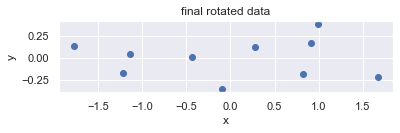

In [75]:
mat =[eigen_vec[:,0],-eigen_vec[:,1]]
data_final=np.dot(mat,np.array(dat))

plt.scatter(data_final[1],data_final[0])
plt.gca().set_aspect('equal')
plt.title('final rotated data')
plt.xlabel('x')
plt.ylabel('y');


I exchanged $x$ and $y$ to plot the data horizontally.

 Note, how the date has been rotated such that, the new coordinate axes are aligned with the directions of largest variability.  

### 6) Reduce data dimension

In the rotated data it is easy to get rid of that part of the data that carries little information, i.e. the rotated y-value of each data point. Compare the variance along each axis:

In [41]:
print("Variance along axis 1:", np.var(data_final[0]))
print("Variance along axis 2:", np.var(data_final[1]))

Variance along axis 1: 0.044175059044494557
Variance along axis 2: 1.155624940955505


We can reduce variability by just setting all data along axis 1 to 0:

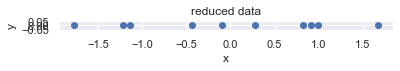

In [76]:
data_reduced=np.array([np.full(10,0),data_final[1]])

plt.scatter(data_reduced[1],data_reduced[0])
plt.gca().set_aspect('equal')
plt.title('reduced data')
plt.xlabel('x')
plt.ylabel('y');

Rotating the data back in the original coordinate system:

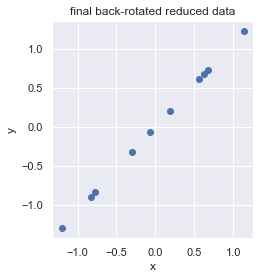

In [77]:
data_backrot=np.dot(mat,data_reduced)
plt.scatter(data_backrot[0],data_backrot[1])
plt.gca().set_aspect('equal')
plt.title('final back-rotated reduced data')
plt.xlabel('x')
plt.ylabel('y');

However, this can be achieved easier. If we set the eigenvector, i.e. the diemnsion or axis, that we wish to suppress to the null vector, we immediately get the same result as if we had rotated first and then manually set one dimension to 0's.

In [52]:
mat2 =[[0,0],-eigen_vec[:,1]]
data_final2=np.dot(mat2,dat)
print(data_final2)
print(data_final2[1]==data_final[1])

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.82797019 -1.77758033  0.99219749  0.27421042  1.67580142  0.9129491
  -0.09910944 -1.14457216 -0.43804614 -1.22382056]]
[ True  True  True  True  True  True  True  True  True  True]


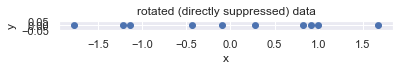

In [78]:
mat2 =[[0,0],-eigen_vec[:,1]]
data_final2=np.dot(mat2,dat)

plt.scatter(data_final2[1],data_final2[0])
plt.gca().set_aspect('equal')
plt.title('rotated (directly suppressed) data')
plt.xlabel('x')
plt.ylabel('y');

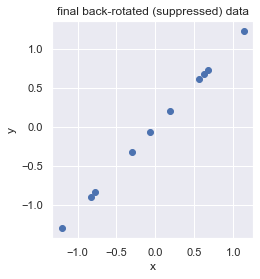

In [79]:
data_final2_back=np.dot(mat,data_final2)

plt.scatter(data_final2_back[0],data_final2_back[1])
plt.gca().set_aspect('equal')
plt.title('final back-rotated (suppressed) data')
plt.xlabel('x')
plt.ylabel('y');

Checking that both approaches give identical results:

In [57]:
print(data_final2_back)
print(data_backrot)
print(data_backrot==data_final2_back)

[[ 0.56125896 -1.20497442  0.67258429  0.18587995  1.1359812   0.61886391
  -0.06718365 -0.77587502 -0.29693982 -0.8295954 ]
 [ 0.60870601 -1.30683911  0.72944242  0.20159364  1.23201343  0.67118069
  -0.07286314 -0.84146502 -0.32204217 -0.89972675]]
[[ 0.56125896 -1.20497442  0.67258429  0.18587995  1.1359812   0.61886391
  -0.06718365 -0.77587502 -0.29693982 -0.8295954 ]
 [ 0.60870601 -1.30683911  0.72944242  0.20159364  1.23201343  0.67118069
  -0.07286314 -0.84146502 -0.32204217 -0.89972675]]
[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]


Some questions you should consider:

-  What could be a possible motivation to get rid of variability in one of the dimensions?
-  Can you think of applications?
-  Imagine the original coordinate axes came with some physical units, e.g. distance (m) and time (s). What are the units in the principal coordinate system?

### 7) Use built-in PCA

Using the scikit.learn module we can do the PCA directly, now that we understand how to do it manually. There is an important difference though! The function sklearn.decomposition.pca needs the data vector in a transposed format compared to what we did above. The x vector is the first column, the y vector is the second column of the data vector:

In [15]:
dat.T

array([[ 0.69,  0.49],
       [-1.31, -1.21],
       [ 0.39,  0.99],
       [ 0.09,  0.29],
       [ 1.29,  1.09],
       [ 0.49,  0.79],
       [ 0.19, -0.31],
       [-0.81, -0.81],
       [-0.31, -0.31],
       [-0.71, -1.01]])

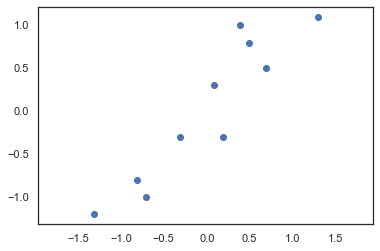

In [372]:
from sklearn.decomposition import PCA

plt.scatter(dat[0], dat[1])
plt.axis('equal');

In [17]:
pca = PCA(n_components=2)
pca.fit(dat.T)
PCA(n_components=2)
print(pca.explained_variance_ratio_)
print(pca.components_)

[0.96318131 0.03681869]
[[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]


Here the eigenvalues are stored as explained_variance_ratio_ attribute.

In [32]:
eigen_val / np.sum(eigen_val)

array([0.03681869, 0.96318131])

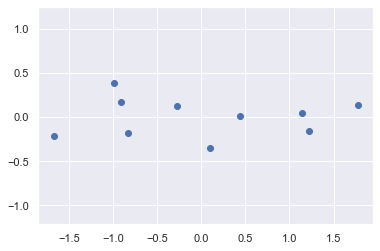

In [34]:
dat_pca = pca.transform(dat.T)
plt.scatter(dat_pca[:, 0], dat_pca[:, 1], alpha=1)
plt.axis('equal');

Recall, how we reduced the dimensionality of our data by setting the transformed $y$ to zero or just rotating with only the first eigenvector? The PCA packages allows to do this more conveniently by specifying how many components you want to keep. Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance. 

In [37]:
pca = PCA(n_components=1)
pca.fit(dat.T)
dat_pca = pca.transform(dat.T)
print("original shape:   ", dat.T.shape)
print("transformed shape:", dat_pca.shape)

original shape:    (10, 2)
transformed shape: (10, 1)


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

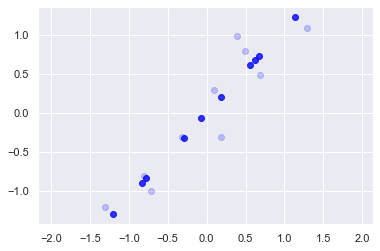

In [43]:
dat_new = pca.inverse_transform(dat_pca)
plt.scatter(dat.T[:,0], dat.T[:, 1], c='blue',alpha=0.2)
plt.scatter(dat_new[:, 0], dat_new[:, 1], c='blue', alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

<div class="alert alert-block alert-warning">

### Hands on part

Use the following function to draw a vector in the function you are writing below.
    
</div>

In [91]:
def draw_arrow(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(edgecolor='gray',
                    arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

<div class="alert alert-block alert-warning">

1. Write a function that takes a dataset, performs the PCA and plots the original data together with the PCA as arrows. Also plot the transformed data next to it. Use for example,
```python
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
```
2. Create a few artificial dataset of of $N \gtrsim 200$ data points in 2-dim. ($x$ and $y$ pairs). E.g.:
    0. A purely random dataset (maybe use a fixed random seed such as `np.random.RandomState(1)`.
    1. A strongly correlated data set (search for 2-dim random numbers from 2-dim Gaussians.) 
    2. A weakly correlated dataset
    3. A data that combines a systematic behavior, e.g. `y=0.5*x + sin(x/10.)` overlayed with some random noise.
    4. An exponential data, e.g. `y=0.5*exp(0.2*x)`
    5. A polynomial of some higher order.
    
3. Apply your PCA function from 1. to the articial data from 2..
    
    
</div>    

## Topic 2 - PCA: Principal Component Analysis - Image manipulation

(Disclaimer: Some code is taken from the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandboo) by Jake VanderPlas)

To demonstrate these principles on a more interesting problem, let's consider a common optical character recognition problem: the identification of hand-written digits. Here we'll use Scikit-Learn's set of pre-formatted digits. Take a look at the data:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

The data is stored as dictionary, i.e. pairs of keys and values.

In [63]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [49]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [65]:
digits.images.shape

(1797, 8, 8)

The stored images consist of 1797 images of $8\times8$ pixel.

In [66]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

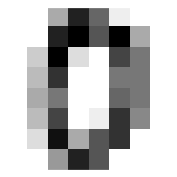

In [61]:
fig, axes = plt.subplots(1, 1, figsize=(3, 3),subplot_kw={'xticks':[], 'yticks':[]})
axes.imshow(digits.images[0], cmap='binary', interpolation='nearest');

The 'target' keyword contains the explanation of the image, i.e. which digit is actually shown:

In [67]:
digits.target[0]

0

Let's visualize the first hundred images together the image label (`target` keyword):

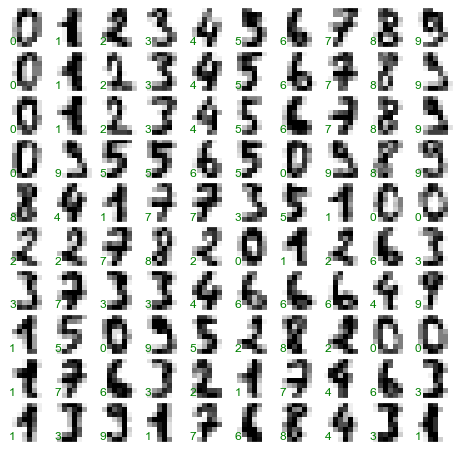

In [47]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

For convenience the image data array is already flattened into a vector of length $8\times8=64$. Note how the image rows are just concatenated to for a long vector.

In [51]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Let's check what numbers occur in all pixel:

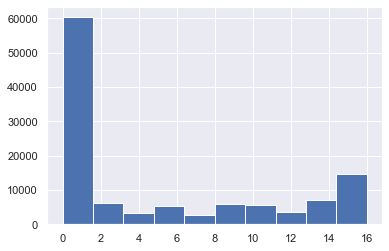

In [111]:
plt.hist(digits.data.flatten());

0 corresponds to a blank pixel, so most pixel values are blank. 

Before we continue let's step back for a moment to consider what the data vector actually means. In the 2-dim case discussed in [Topic 1 - PCA: Principal Component Analysis - Introduction](#PCA1) it was easier to interpret the data; we had two data values :$x$ and $y$. The first value informed us how far to go in $x$ direction, the second value told us how far to go in $y$ direction: 

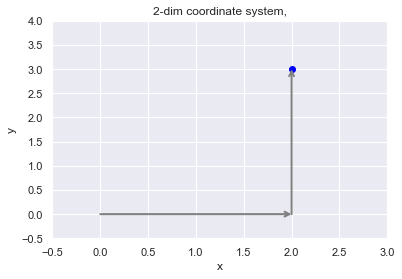

In [92]:
plt.scatter([2], [3],c='blue')
plt.ylim(ymin=-0.5,ymax=4)
plt.xlim(xmin=-0.5,xmax=3)
draw_arrow([0,0], [2,0])
draw_arrow([2,0], [2,3])
plt.title('2-dim coordinate system,')
plt.xlabel('x')
plt.ylabel('y');

If we have 3-dim data, we go $x,y,z$ along each coordinate axis, respectively. Now we have an $8\times8$ image rearranged into a vector with $64$ dimensions, i.e. coordinate axes: $x_1,x_2,..,x_{64}$. Accordingly, the first data value, the brightness value of pixel 1, tells us how far to go in direction of $x_1$, and so on. Every image in our dataset corresponds to a point in our 64-dim coordinate system (similarly to the 2-dim example above). If we had an image taken with a modern smartphone it would maybe have 64 megapixel, and would span a coordinate system with 64 million dimensions (1 per pixel).  

In this  coordinate systems, similar images should be positioned in close neighborhood. Take for example the image of the digit 0:

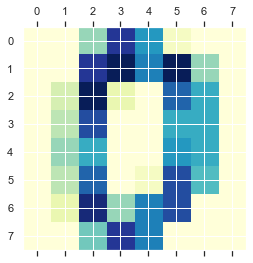

In [95]:
plt.matshow(digits.images[0], cmap="YlGnBu")

Every image of a 0 will be blank in the corners and in the image center and be dark in a circular region around the center. This corresponds to a certain hypervolume in our 64-dim space. Naively, we could argue that if the image data corresponds to a point in this hypervolume it is an image of a 0. Practically there may be a possible confuision with similar digits, e.g. the digit 8.

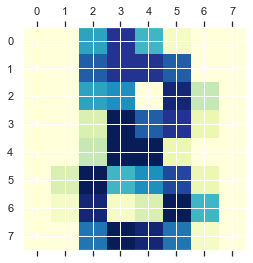

In [97]:
plt.matshow(digits.images[8], cmap="YlGnBu")

Somehow, we should be able to visualize this clustering of image vectors, but how do we plot 64-dim data? On paper (or screen) we are practically limited to 2-dim (even 3-dim plots are actually projections of 3-dim to the 2-dim plane). We could for instance plot the first two dimensions or our image vector space: 

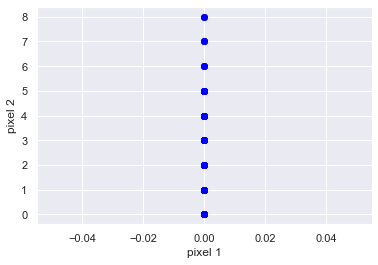

In [105]:
plt.scatter(digits.data[:,0], digits.data[:,1], c='blue')
plt.xlabel('pixel 1')
plt.ylabel('pixel 2');

This looks strange, but think about it. Apparently pixel 1 is 0 (i.e. blank) in all images, which is not too unreasonable. No hand-drawn digit covers th etop left pixel - sounds ok. Pixel 2 takes (integer) values between 0 and 8. Yet, this doesn't give us any information on the shape of the digit. No simple combination of 2 pixel values will tell us what digit the image shows. Even the first 8 coordinate values, i.e. the first row of the image is not very informative.  

The following routine plots the image on the left. In the top row in the center it plots the first 8 pixel information. The bottom row is the cumulative information, i.e. adding more and more pixel to the image. To the right we see the result. See how the firsz 8 values of our data vector tells us little about the digit it is supposed to show.

In [140]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest',cmap='binary')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig

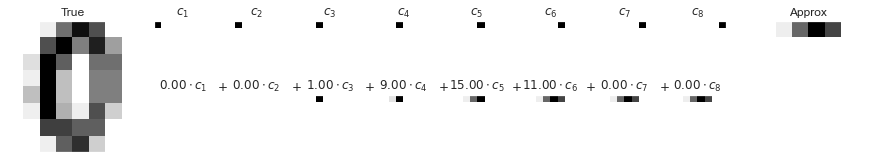

In [141]:
fig = plot_pca_components(digits.data[10],
                          show_mean=False)

This is, where dimensionality reduction comes into play. We can use PCA to project them to a more manageable number of dimensions, say two:

In [112]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to visualize the data:

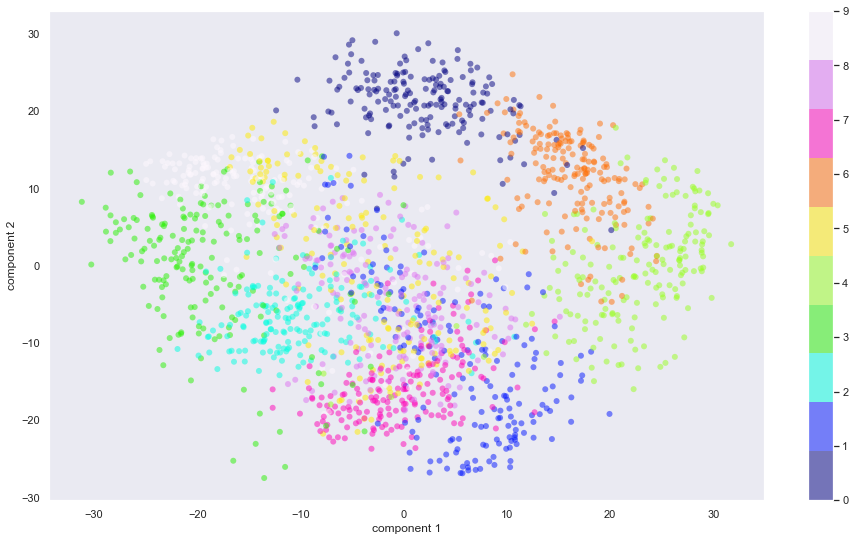

In [136]:
plt.figure(figsize=(16, 9))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_ncar', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.rcParams['axes.grid'] = False
plt.colorbar();

Recall what PCA does. It transforsm the data to a new 64-dim coordinate system with decreasing variance along the respective directions. So the figure above is the projection of each data point along the directions with the largest variance. Using PCA, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions. And we did not have to tell the PCA what digit each data vector corresponds to, in machine learning terminaology, our method is **unsupervised**.

Recall how the first 8 image coordinates didn't contain a significant amount of information about the full image. This is different in the PCA system. Here we show how the first 8 (back-transformed) components contribute to the total image.

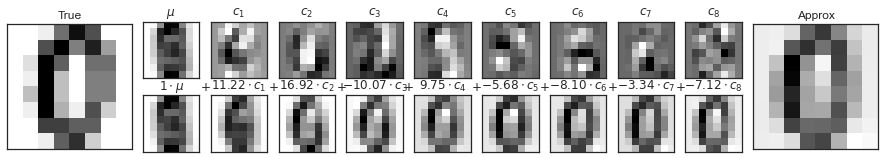

In [142]:
pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
sns.set_style('white')
fig = plot_pca_components(digits.data[10], Xproj[10],
                          pca.mean_, pca.components_)

The $\mu$ is the mean image, $c_1,...c_8$ are the first 8 eigen-images, the 8 principal compents, i.e. the eigenvectors of the covariance matrix in our original image coordinate system. Below we can see how the original image can be approximated by the coordinate values along the first 8 principal axes. The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.

### Choosing the number of significant components

How do we know that 8 components suffice to explain most of the date (the image)? We could, for instance, compute the cumulative *explained variance ratio* as function of the number of used components. 

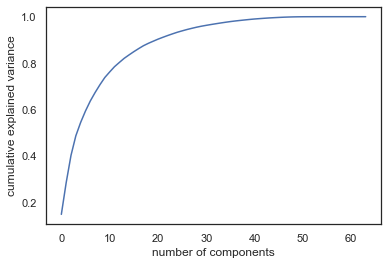

In [143]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

<div class="alert alert-block alert-warning">
    
### Hands-on part
    
1. Split the data into 10 datasets (one per digit).
    1. Perform the PCA on each digi data and plot the first two components.
    2. Plot the cumulative explained variance ratio per digit and test whether we do we need the same number of components for each digit.
2. Download the 'mnist_784' data from [https://openml.org](https://openml.org). Instead of $8\times8$ pixel images it contains $28\times28$ pixel images of handwritten digits. Redo the steps from this section and compare. Here are a few first steps to get you running:
</div>

In [144]:
from sklearn.datasets import fetch_openml
bigdata = fetch_openml(name='mnist_784')

In [148]:
bigdata.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [150]:
bigdata.data.shape

(70000, 784)

In [152]:
bigdata.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
type(bigdata.data)

pandas.core.frame.DataFrame

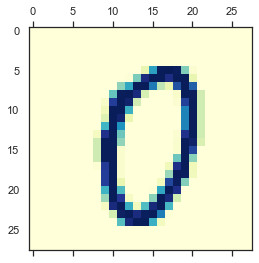

In [168]:
plt.matshow(np.array(bigdata.data.iloc[1000]).reshape(28,28), cmap="YlGnBu")

## Topic 3 - PCA: Principal Component Analysis - Noise filtering

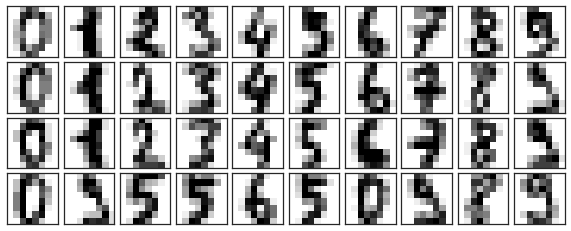

In [169]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

We will create some noisy versions of this data. Possible options are:

| # | base data | noise |
| :- | :- | :- |
| 1 | one image | one noise type same parameters |
| 2 | one image | one noise type different parameters |
| 3 | one image | several noise types |
| 4 | all images | one noise type same parameters |
| 5 | all images | one noise type different parameters |
| 6 | all images | several noise types |

We start with case 1

In [184]:
zerodata=np.repeat(digits.data[0][np.newaxis,:], len(digits.data), 0)
len(zerodata)

1797

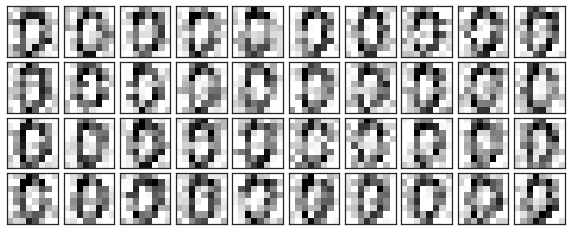

In [187]:
np.random.seed(123)  # during prototyping allways use a random seed to make results reproducable
sigma = 3
noisy = np.random.normal(zerodata, sigma)
plot_digits(noisy)

Let's train a PCA on the noisy data. The routine accepts a parameter requesting that the projection preserve 50% of the variance:

In [191]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

27

50% of the variance amounts to 27 principal components. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits. Looking at the full cumulative explained ratio we note how many more components we need to explain the data.

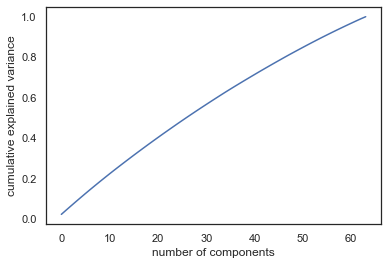

In [192]:
pca = PCA().fit(noisy)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Before plotting we replace the 40th entry with our original digit for visual comparison:

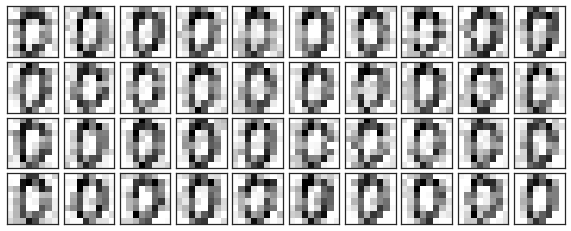

In [190]:
pca = PCA(0.50).fit(noisy)
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
filtered[39]=digits.data[0]
plot_digits(filtered)

<div class="alert alert-block alert-warning">
    
#### Exercise

1. Expand the case 1 by adding some more variations of handwritten '0' to see whether the cumulative explained variance ratio changes.
2. Repeat with a different digit. What type of digit is more uniform? which is more diverse in handwriting?
</div>

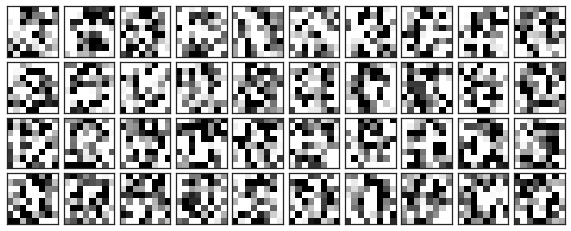

In [222]:
np.random.seed(123)  # during prototyping allways use a random seed to make results reproducable
def noisify(x):
    sig = np.random.uniform(0,16)
    #print('sigma =',sig)
    return np.random.normal(x, sig)
noisy = noisify(zerodata)
plot_digits(noisy)

The code above is **wrong**. Why? Consider the print statement uncommented. What did you expect? Why does the following is different?

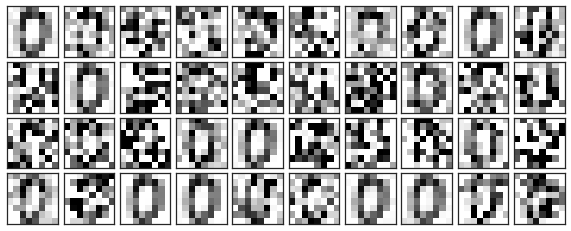

In [223]:
noisy = [noisify(dig) for dig in zerodata]
plot_digits(noisy)

In [224]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

26

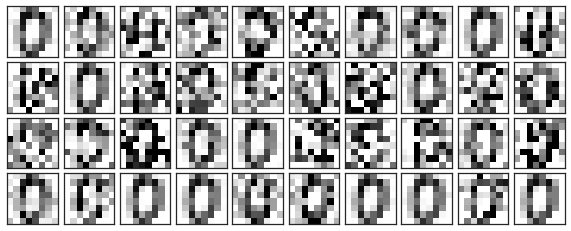

In [225]:
pca = PCA(0.50).fit(noisy)
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
filtered[39]=digits.data[0]
plot_digits(filtered)

Now, we repeat on all images.

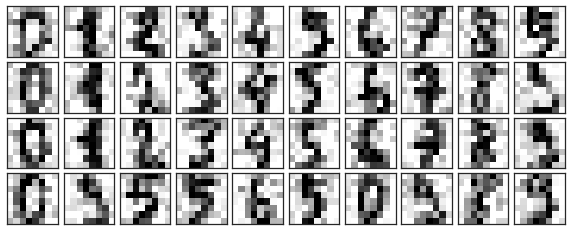

In [239]:
np.random.seed(123)  # during prototyping allways use a random seed to make results reproducable
sigma = 3
noisy = np.random.normal(digits.data, sigma)
plot_digits(noisy)

In [240]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

8

Here 50% of the variance amounts to 12 principal components. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

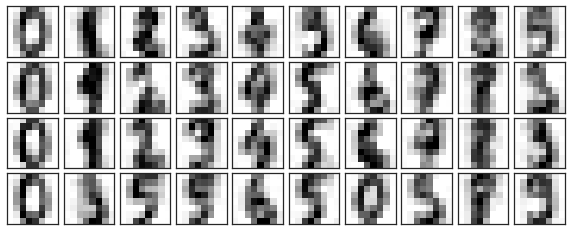

In [241]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

<div class="alert alert-block alert-warning">

#### Exercise
    
1. How many components are required to explain 50% variability for different values of sigma? Plot the result

</div>

In the following we will work with the higher resolution images from the MNIST_784 dataset.

In [250]:
bigdigits_data= [ np.array(bigdata.data.iloc[idx]) for idx in range(70000)]  

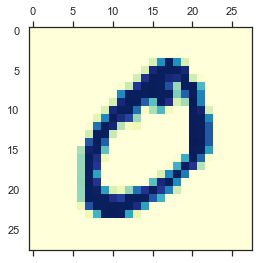

In [251]:
plt.matshow(bigdigits_data[1].reshape(28,28), cmap="YlGnBu")

In [252]:
zerodata=np.repeat(bigdigits_data[1][np.newaxis,:], 100, 0)
len(zerodata)

100

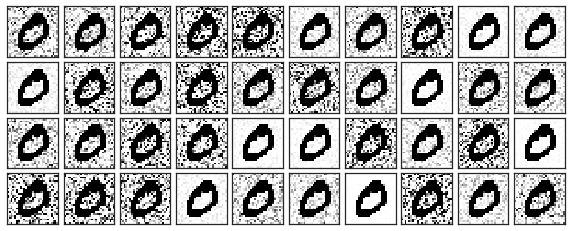

In [341]:
def plot_bigdigits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28), cmap='binary',clim=(0, 16),
                  interpolation='nearest')
noisy = [noisify(dig) for dig in zerodata]
plot_bigdigits(noisy)

In [328]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

18

Note, how we need fewer components (19 instead of 27) to explain the variability in the images with higher resolution!

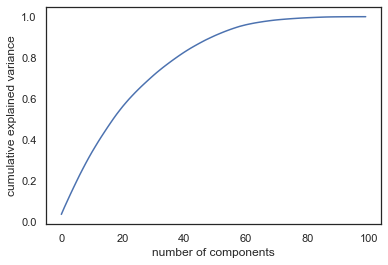

In [329]:
pca = PCA().fit(noisy)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

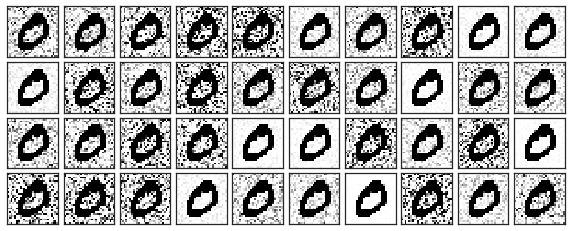

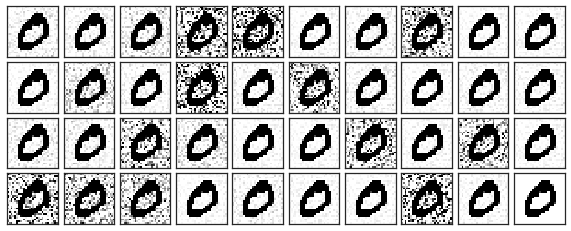

In [342]:
pca = PCA(0.50).fit(noisy)
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
filtered[39]=zerodata[0]
plot_bigdigits(noisy)
plot_bigdigits(filtered)

Can a second round help further?

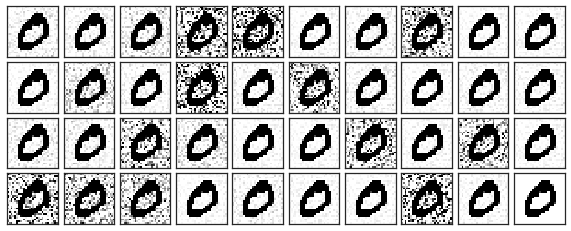

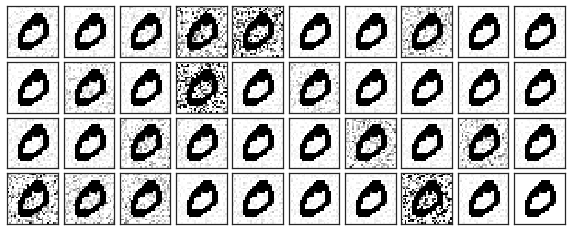

In [343]:
pca = PCA(0.50).fit(filtered)
components = pca.transform(filtered)
filtered2 = pca.inverse_transform(components)
filtered2[39]=zerodata[0]
plot_bigdigits(filtered)
plot_bigdigits(filtered2)

Note, how the noisy was removed even further.

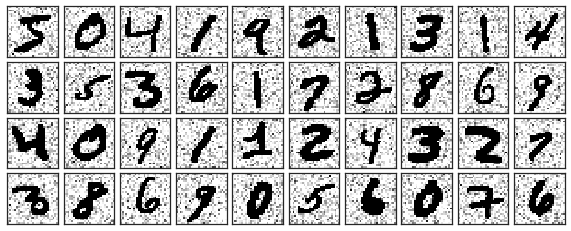

In [344]:
np.random.seed(123)  # during prototyping allways use a random seed to make results reproducable
sigma = 5
noisy = np.random.normal(bigdigits_data, sigma)
plot_bigdigits(noisy)

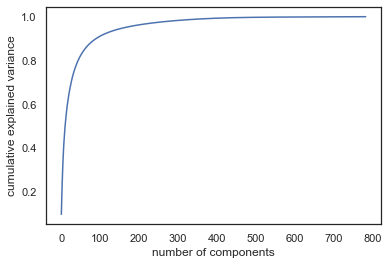

In [345]:
pca = PCA().fit(noisy)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [346]:
frac=int(12/64*784)
frac=25
pca = PCA(n_components=frac).fit(noisy)
components = pca.transform(noisy)
pca.n_components_

25

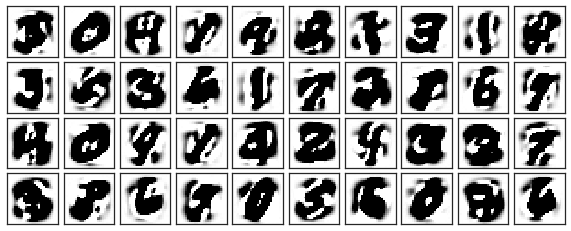

In [347]:
filtered = pca.inverse_transform(components)
plot_bigdigits(filtered)

This does not look good. Why is that? Consider the following plot of one of the filtered images:

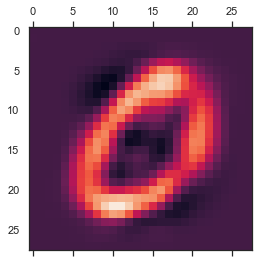

In [348]:
plt.matshow(filtered[1].reshape(28,28))

Looks much better.

<div class="alert alert-block alert-warning">
    
#### Exercise

1. Look at the definition of `plot_bigdigits` and change the argument `clim=(0, 16)`to some other limits. What does it do? What are good limits. How does this change the resulting visualization?
2. Play around with different colormaps.

    </div>

## Topic 4 - PCA: Principal Component Analysis - Face recognition

In [357]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


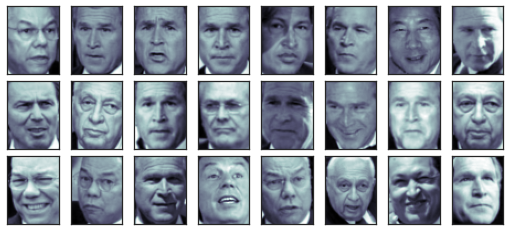

In [375]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i], cmap='bone')

Let's take a look at the principal axes that span this dataset. Because this is a large dataset, we will use RandomizedPCA—it contains a randomized method to approximate the first N principal components much more quickly than the standard PCA estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000). We will take a look at the first 150 components:

In [374]:
pca = PCA(n_components=150, svd_solver='randomized', whiten=True)
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized', whiten=True)

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors," so these types of images are often called "eigenfaces"). As you can see in this figure, they are as creepy as they sound:

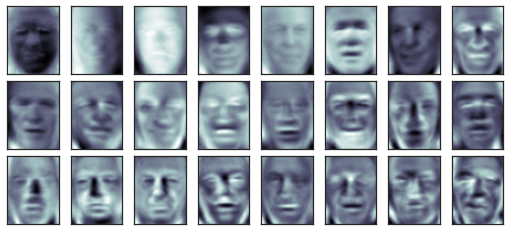

In [367]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips. Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

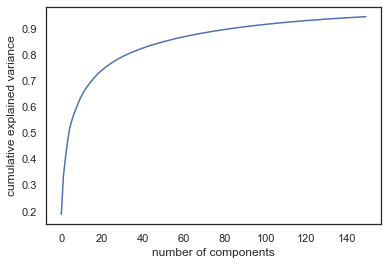

In [376]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We see that these 150 components account for just over 90% of the variance. That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data. To make this more concrete, we can compare the input images with the images reconstructed from these 150 components:

In [381]:
# Compute the components and projected faces
pca = PCA(n_components=150, svd_solver='randomized', whiten=True).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

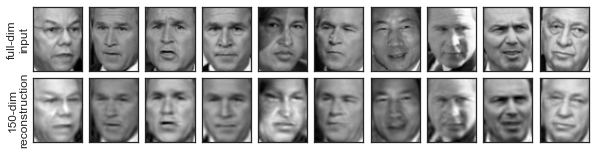

In [382]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features. This visualization makes clear why the PCA feature selection used was so successful: although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image. What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.

It also means that a face can be encoded with 150 values, i.e. the coordinates along the forst 150 components.

PCA's main weakness is that it tends to be highly affected by outliers in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components. Scikit-Learn contains a couple interesting variants on PCA, including RandomizedPCA and SparsePCA, both also in the sklearn.decomposition submodule.

<div class="alert alert-block alert-warning">
    
#### Exercise

1. Change the number of components and compare how much information you need to actually recognize a face.
2. Take a second face dataset and
    1. Combine them and redo the exercise.
    2. Can you encode the faces from the second dataset with the eigenfaces from the first?
    3. Take a photo from yourself and encode it in the pre-determined eigenface system. How good is the reconstruction?

    </div>

In [14]:
from sklearn.datasets import fetch_olivetti_faces
faces2, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=123)
n_samples2, n_features2 = faces2.shape
# Global centering (focus on one feature, centering all samples)
faces2_centered = faces2 - faces2.mean(axis=0)

# Local centering (focus on one sample, centering all features)
faces2_centered -= faces2_centered.mean(axis=1).reshape(n_samples2, -1)

print("Dataset consists of %d faces" % n_samples2)

Dataset consists of 400 faces


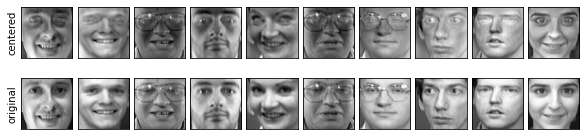

In [15]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0,i].imshow(faces2_centered[i].reshape(64,64), cmap='binary_r')
    ax[1, i].imshow(faces2[i].reshape(64,64), cmap='binary_r')
    
ax[0, 0].set_ylabel('centered')
ax[1, 0].set_ylabel('original');

# NLP Natural language Processing

Material in this section is taken from [Dive into deep learning](https://d2l.ai/index.html) and from  [this course](https://www.cs.toronto.edu/~lczhang/321/).

## NLP - Word Embedding

Natural language is a complex system used to express meanings. In this system, words are the basic unit of the meaning. As the name implies, word vectors are vectors used to represent words, and can also be considered as feature vectors or representations of words. The technique of mapping words to real vectors is called word embedding. In recent years, word embedding has gradually become the basic knowledge of natural language processing.

In [408]:
import re      # regular expression handling
import collections
def read_time_machine(): 
    """Load the time machine dataset into a list of text lines."""
    with open('time_machine.txt', 'r',  encoding='utf-8', errors='ignore') as f:
        lines = f.readlines()
    return [re.sub('[^A-Za-z]+', ' ', line).strip().lower() for line in lines]

lines = read_time_machine()
print(f'# text lines: {len(lines)}')
print(lines[0])
print(lines[10])

# text lines: 3557
the project gutenberg ebook of the time machine by h g wells
title the time machine


## Tokenization

The following `tokenize` function
takes a list (`lines`) as the input,
where each element is a text sequence (e.g., a text line).
**Each text sequence is split into a list of tokens**.
A *token* is the basic unit in text.
In the end,
a list of token lists are returned,
where each token is a string.


In [403]:
def tokenize(lines, token='word'): 
    """Split text lines into word or character tokens."""
    if token == 'word':
        return [line.split() for line in lines]
    elif token == 'char':
        return [list(line) for line in lines]
    else:
        print('ERROR: unknown token type: ' + token)

tokens = tokenize(lines)
for i in range(11):
    print(tokens[i])

['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'time', 'machine', 'by', 'h', 'g', 'wells']
[]
['this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'united', 'states', 'and']
['most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions']
['whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms']
['of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at']
['www', 'gutenberg', 'org', 'if', 'you', 'are', 'not', 'located', 'in', 'the', 'united', 'states', 'you']
['will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before']
['using', 'this', 'ebook']
[]
['title', 'the', 'time', 'machine']


## Vocabulary

The string type of the token is inconvenient to be used by models, which take numerical inputs.
Now let us **build a dictionary, often called *vocabulary* as well, to map string tokens into numerical indices starting from 0**.
To do so, we first count the unique tokens in all the documents from the training set,
namely a *corpus*,
and then assign a numerical index to each unique token according to its frequency.
Rarely appeared tokens are often removed to reduce the complexity.
Any token that does not exist in the corpus or has been removed is mapped into a special unknown token “&lt;unk&gt;”.
We optionally add a list of reserved tokens, such as
“&lt;pad&gt;” for padding,
“&lt;bos&gt;” to present the beginning for a sequence, and “&lt;eos&gt;” for the end of a sequence.

In [406]:
class Vocab: 
    """Vocabulary for text."""
    def __init__(self, tokens=None, min_freq=0, reserved_tokens=None):
        if tokens is None:
            tokens = []
        if reserved_tokens is None:
            reserved_tokens = []
        # Sort according to frequencies
        counter = count_corpus(tokens)
        self._token_freqs = sorted(counter.items(), key=lambda x: x[1],
                                   reverse=True)
        # The index for the unknown token is 0
        self.idx_to_token = ['<unk>'] + reserved_tokens
        self.token_to_idx = {token: idx
                             for idx, token in enumerate(self.idx_to_token)}
        for token, freq in self._token_freqs:
            if freq < min_freq:
                break
            if token not in self.token_to_idx:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) - 1

    def __len__(self):
        return len(self.idx_to_token)

    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]

    def to_tokens(self, indices):
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]

    @property
    def unk(self):  # Index for the unknown token
        return 0

    @property
    def token_freqs(self):  # Index for the unknown token
        return self._token_freqs

def count_corpus(tokens): 
    """Count token frequencies."""
    # Here `tokens` is a 1D list or 2D list
    if len(tokens) == 0 or isinstance(tokens[0], list):
        # Flatten a list of token lists into a list of tokens
        tokens = [token for line in tokens for token in line]
    return collections.Counter(tokens)

We **construct a vocabulary** using the time machine dataset as the corpus.
Then we print the first few frequent tokens with their indices.

In [409]:
vocab = Vocab(tokens)
print(list(vocab.token_to_idx.items())[:10])

[('<unk>', 0), ('the', 1), ('and', 2), ('of', 3), ('i', 4), ('a', 5), ('to', 6), ('in', 7), ('was', 8), ('that', 9)]


Now we can (**convert each text line into a list of numerical indices**).

In [410]:
for i in [0, 10]:
    print('words:', tokens[i])
    print('indices:', vocab[tokens[i]])

words: ['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'time', 'machine', 'by', 'h', 'g', 'wells']
indices: [1, 53, 44, 314, 3, 1, 19, 46, 33, 1163, 1164, 360]
words: ['title', 'the', 'time', 'machine']
indices: [2445, 1, 19, 46]


## Putting All Things Together

Using the above functions, we **package everything into the `load_corpus_time_machine` function**, which returns `corpus`, a list of token indices, and `vocab`, the vocabulary of the time machine corpus.
The modifications we did here are:
(i) we tokenize text into characters, not words, to simplify the training in later sections;
(ii) `corpus` is a single list, not a list of token lists, since each text line in the time machine dataset is not necessarily a sentence or a paragraph.

In [411]:
def load_corpus_time_machine(max_tokens=-1): 
    """Return token indices and the vocabulary of the time machine dataset."""
    lines = read_time_machine()
    tokens = tokenize(lines, 'char')
    vocab = Vocab(tokens)
    # Since each text line in the time machine dataset is not necessarily a
    # sentence or a paragraph, flatten all the text lines into a single list
    corpus = [vocab[token] for line in tokens for token in line]
    if max_tokens > 0:
        corpus = corpus[:max_tokens]
    return corpus, vocab

corpus, vocab = load_corpus_time_machine()
len(corpus), len(vocab)

(189663, 28)

These tokens can be viewed as a sequence of discrete observations, such as words or characters.
Assume that the tokens in a text sequence of length $T$ are in turn $x_1, x_2, \ldots, x_T$. 
Then, in the text sequence,
$x_t$($1 \leq t \leq T$) can be considered as the observation or label at time step $t$. Given such a text sequence,
the goal of a *language model* is to estimate the joint probability of the sequence

$$P(x_1, x_2, \ldots, x_T).$$

Language models are incredibly useful. For instance, an ideal language model would be able to generate natural text just on its own, simply by drawing one token at a time $x_t \sim P(x_t \mid x_{t-1}, \ldots, x_1)$.
Quite unlike the monkey using a typewriter, all text emerging from such a model would pass as natural language, e.g., English text. Furthermore, it would be sufficient for generating a meaningful dialog, simply by conditioning the text on previous dialog fragments.
Clearly we are still very far from designing such a system, since it would need to *understand* the text rather than just generate grammatically sensible content.

Nonetheless, language models are of great service even in their limited form.
For instance, the phrases "to recognize speech" and "to wreck a nice beach" sound very similar.
This can cause ambiguity in speech recognition,
which is easily resolved through a language model that rejects the second translation as outlandish.
Likewise, in a document summarization algorithm
it is worthwhile knowing that "dog bites man" is much more frequent than "man bites dog", or that "I want to eat grandma" is a rather disturbing statement, whereas "I want to eat, grandma" is much more benign.


## Learning a Language Model

How can should model a document, or even a sentence?  
Suppose that we tokenize text data at the word level.
Let us start by applying basic probability rules:

$$P(x_1, x_2, \ldots, x_T) = \prod_{t=1}^T P(x_t  \mid  x_1, \ldots, x_{t-1}).$$

For example, 
the probability of a text sequence containing four words would be given as:

$$P(\text{deep}, \text{learning}, \text{is}, \text{fun}) =  P(\text{deep}) P(\text{learning}  \mid  \text{deep}) P(\text{is}  \mid  \text{deep}, \text{learning}) P(\text{fun}  \mid  \text{deep}, \text{learning}, \text{is}).$$

In order to compute the language model, we need to calculate the
probability of words and the conditional probability of a word given
the previous few words.
Such probabilities are essentially
language model parameters.

The probability of words can be calculated from the relative word
frequency of a given word in the training dataset.
For example, we could count all occurrences of
the word "deep" and divide it by the total number of words in
the corpus.
This works fairly well, particularly for frequent
words. Moving on, we could attempt to estimate

$$\hat{P}(\text{learning} \mid \text{deep}) = \frac{n(\text{deep, learning})}{n(\text{deep})},$$

where $n(x)$ and $n(x, x')$ are the number of occurrences of singletons
and consecutive word pairs, respectively.
Unfortunately, estimating the
probability of a word pair is somewhat more difficult, since the
occurrences of "deep learning" are a lot less frequent. We ignore all resulting complications for the moment.

### Markov Models and $n$-grams

A distribution over sequences satisfies the Markov property of first order if $P(x_{t+1} \mid x_t, \ldots, x_1) = P(x_{t+1} \mid x_t)$. Higher orders correspond to longer dependencies. This leads to a number of approximations that we could apply to model a sequence:

$$
\begin{aligned}
P(x_1, x_2, x_3, x_4) &=  P(x_1) P(x_2) P(x_3) P(x_4),\\
P(x_1, x_2, x_3, x_4) &=  P(x_1) P(x_2  \mid  x_1) P(x_3  \mid  x_2) P(x_4  \mid  x_3),\\
P(x_1, x_2, x_3, x_4) &=  P(x_1) P(x_2  \mid  x_1) P(x_3  \mid  x_1, x_2) P(x_4  \mid  x_2, x_3).
\end{aligned}
$$

The probability formulae that involve one, two, and three variables are typically referred to as *unigram*, *bigram*, and *trigram* models, respectively. 

## Natural Language Statistics

Let us look at some real data.
We construct a vocabulary based on the text of *Time Machine*
and print the top 10 most frequent words.

In [414]:
# Since each text line is not necessarily a sentence or a paragraph, we
# concatenate all text lines
corpus = [token for line in tokens for token in line]
vocab = Vocab(corpus)
vocab.token_freqs[:10]

[('the', 2477),
 ('and', 1312),
 ('of', 1286),
 ('i', 1268),
 ('a', 877),
 ('to', 766),
 ('in', 606),
 ('was', 554),
 ('that', 458),
 ('it', 452)]

As we can see, (**the most popular words are**) actually quite boring to look at.
They are often referred to as (***stop words***) and thus filtered out.
Nonetheless, they still carry meaning and we will still use them.
Besides, it is quite clear that the word frequency decays rather rapidly. The $10^{\mathrm{th}}$ most frequent word is less than $1/5$ as common as the most popular one. 

<div class="alert alert-block alert-warning">
    
To get a better idea,  **plot the figure of the word frequency**.

</div>

In [415]:
freqs = [freq for token, freq in vocab.token_freqs]

# plot freqs

We are on to something quite fundamental here: the word frequency decays rapidly in a well-defined way.
After dealing with the first few words as exceptions, all the remaining words roughly follow a straight line on a log-log plot. This means that words satisfy *Zipf's law*,
which states that the frequency $n_i$ of the $i^\mathrm{th}$ most frequent word
is:

$$n_i \propto \frac{1}{i^\alpha},$$

which is equivalent to

$$\log n_i = -\alpha \log i + c,$$

where $\alpha$ is the exponent that characterizes the distribution and $c$ is a constant.
This should already give us pause if we want to model words by counting statistics and smoothing.
After all, we will significantly overestimate the frequency of the tail, also known as the infrequent words. But [**what about the other word combinations, such as bigrams, trigrams**], and beyond?

Let us see whether the bigram frequency behaves in the same manner as the unigram frequency.

In [416]:
bigram_tokens = [pair for pair in zip(corpus[:-1], corpus[1:])]
bigram_vocab = Vocab(bigram_tokens)
bigram_vocab.token_freqs[:10]

[(('of', 'the'), 344),
 (('in', 'the'), 192),
 (('i', 'had'), 130),
 (('and', 'the'), 112),
 (('i', 'was'), 112),
 (('the', 'time'), 110),
 (('to', 'the'), 101),
 (('it', 'was'), 99),
 (('project', 'gutenberg'), 88),
 (('as', 'i'), 78)]

<div class="alert alert-block alert-warning">
    
**Plot the figure of the bigram frequency**.

</div>

Out of the ten most frequent word pairs, nine are composed of both stop words and only one is relevant to the actual book---"the time". Now, let us see whether the trigram frequency behaves in the same manner.

<div class="alert alert-block alert-warning">
    
**Compute the trigram frequency**.

</div>

Last, let us [**visualize the token frequency**] among these three models: unigrams, bigrams, and trigrams.

<div class="alert alert-block alert-warning">
    
#### Exercise
    
1. Explore the bigram and trigram distribution.
2. Estimate the exponent of Zipf's law for unigrams, bigrams, and trigrams.

</div>

## One-hot Encoding



The easiest representation of a dictionary is called one-hot encoding.

A one-hot encoding is a vector with as many components as we have categories, i.e. words or tokens.
The component corresponding to particular instance's category is set to 1
and all other components are set to 0.

Each word is represented by a different unit vector: assume that the number of different tokens (words) in the vocabulary is 𝑁 (len(vocabulary)) and the token indices range from 0 to 𝑁−1. If the index of a token is the integer 𝑖, then we create a vector of all 0s with a length of 𝑁 and set the element at position 𝑖 to 1. This vector is the one-hot vector of the original token. The one-hot vectors with indices 0 and 2 are shown below.

In [417]:
import torch
import torchtext
from torch import nn
from torch.nn import functional as F
F.one_hot(torch.tensor([0, 2]), len(vocab))

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0]])

### Why are One-Hot Vectors a Bad Choice ?

Suppose that the number of different words in the dictionary (the dictionary size) is $N$,
and each word corresponds to
a different integer (index) from $0$ to $N−1$.
To obtain the one-hot vector representation
for any word with index $i$,
we create a length-$N$ vector with all 0s
and set the element at position $i$ to 1.


Although one-hot word vectors are easy to construct,
they are usually not a good choice.
A main reason is that one-hot word vectors cannot accurately express the similarity between different words, such as the *cosine similarity* that we often use.
For vectors $\mathbf{x}, \mathbf{y} \in \mathbb{R}^d$, their cosine similarity is the cosine of the angle between them:


$$\frac{\mathbf{x}^\top \mathbf{y}}{\|\mathbf{x}\| \|\mathbf{y}\|} \in [-1, 1].$$


Since the cosine similarity between one-hot vectors of any two different words is 0,
one-hot vectors cannot encode similarities among words. Also the dimensionality of the full vector space of one-hot vectors is huge and sparse. We want to have a better solution.

<div class="alert alert-block alert-warning">

#### Exercise
    
**Can you think of an alternative way to encode a dictionary that keeps relations between individual words (and maybe some of their meanimng)?**.

</div>

### The Skip-Gram Model

The *skip-gram* model assumes that a word is related to (i.e. can be used to generate) its surrounding words in a text sequence.
Take the text sequence "the", "man", "loves", "his", "son" as an example.
Let us choose "loves" as the *center word* and set the context window size to 2.
Given the center word "loves",
the skip-gram model considers
the conditional probability for generating the *context words*: "the", "man", "his", and "son",
which are no more than 2 words away from the center word:

$$P(\textrm{"the"},\textrm{"man"},\textrm{"his"},\textrm{"son"}\mid\textrm{"loves"}).$$

Assume that
the context words are independently generated
given the center word (i.e., conditional independence).
In this case, the above conditional probability
can be rewritten as

$$P(\textrm{"the"}\mid\textrm{"loves"})\cdot P(\textrm{"man"}\mid\textrm{"loves"})\cdot P(\textrm{"his"}\mid\textrm{"loves"})\cdot P(\textrm{"son"}\mid\textrm{"loves"}).$$


In the skip-gram model, each word
has two $d$-dimensional-vector representations
for calculating conditional probabilities.
More concretely,
for any word with index $i$ in the dictionary,
denote by $\mathbf{v}_i\in\mathbb{R}^d$
and $\mathbf{u}_i\in\mathbb{R}^d$
its two vectors
when used as a *center* word and a *context* word, respectively.
The conditional probability of generating any
context word $w_o$ (with index $o$ in the dictionary) given the center word $w_c$ (with index $c$ in the dictionary) can be modeled by
a softmax operation on vector dot products:


$$P(w_o \mid w_c) = \frac{\text{exp}(\mathbf{u}_o^\top \mathbf{v}_c)}{ \sum_{i \in \mathcal{V}} \text{exp}(\mathbf{u}_i^\top \mathbf{v}_c)},$$

where the vocabulary index set $\mathcal{V} = \{0, 1, \ldots, |\mathcal{V}|-1\}$.
Given a text sequence of length $T$, where the word at time step $t$ is denoted as $w^{(t)}$.
Assume that
context words are independently generated
given any center word.
For context window size $m$,
the likelihood function of the skip-gram model
is the probability of generating all context words
given any center word:


$$ \prod_{t=1}^{T} \prod_{-m \leq j \leq m,\ j \neq 0} P(w^{(t+j)} \mid w^{(t)}),$$

where any time step that is less than $1$ or greater than $T$ can be omitted.

The skip-gram model parameters are the center word vector and context word vector for each word in the vocabulary.
In training, we learn the model parameters by maximizing the likelihood function (i.e., maximum likelihood estimation). This is equivalent to minimizing the following loss function:

$$ - \sum_{t=1}^{T} \sum_{-m \leq j \leq m,\ j \neq 0} \text{log}\, P(w^{(t+j)} \mid w^{(t)}).$$

This constructs a $d$-dim vector space of word vectors.

### Word Embedding with Global Vectors (GloVe)

Word-word co-occurrences 
within context windows
may carry rich semantic information. So far we examined the corpus locally only. But
in a large corpus the
word "solid" is
more likely to co-occur
with "ice" than "steam",
but word "gas"
probably co-occurs with "steam"
more frequently than "ice".
Besides,
global corpus statistics
of such co-occurrences
can be precomputed:
this can lead to more efficient training.
To leverage statistical
information in the entire corpus
for word embedding,
let us interpreting the skip-gram model
using global corpus statistics
such as co-occurrence counts.

Given a corpus having $V$ words, the co-occurrence matrix $X$ will be a $V  \times V$ matrix, where the $i$-th row and $j$-th column of $X$, $X_{ij}$ denotes how many times word $i$ has co-occurred with word $j$. An example co-occurrence matrix might look as follows.

Let $p_{ij} \stackrel{\mathrm{def}}{=} P(w_j \mid w_i)$ be the conditional probability of generating the context word $w_j$ given $w_i$ as the center word in the corpus. The following Table lists several co-occurrence probabilities
given words "ice" and "steam"
and their ratios based on  statistics from a large corpus (adapted from Table 1 in `Pennington, Socher andManning (2014)`.



|$w_k$=|solid|gas|water|fashion|
|:--|:-|:-|:-|:-|
|$p_1=P(w_k\mid \text{ice})$|0.00019|0.000066|0.003|0.000017|
|$p_2=P(w_k\mid\text{steam})$|0.000022|0.00078|0.0022|0.000018|
|$p_1/p_2$|8.9|0.085|1.36|0.96|
:label:`tab_glove`


We can observe the following:

* For a word $w_k$ that is related to "ice" but unrelated to "steam", such as $w_k=\text{solid}$, we expect a larger ratio of co-occurence probabilities, such as 8.9.
* For a word $w_k$ that is related to "steam" but unrelated to "ice", such as $w_k=\text{gas}$, we expect a smaller ratio of co-occurence probabilities, such as 0.085.
* For a word $w_k$ that is related to both "ice" and "steam", such as $w_k=\text{water}$, we expect a ratio of co-occurence probabilities that is close to 1, such as 1.36.
* For a word $w_k$ that is unrelated to both "ice" and "steam", such as $w_k=\text{fashion}$, we expect a ratio of co-occurence probabilities that is close to 1, such as 0.96.

We see that the ratio
of co-occurrence probabilities
can express
the relationship between words. 
Thus, we can design a function
of three word vectors
to fit this ratio.
For the ratio of co-occurrence probabilities
${p_{ij}}/{p_{ik}}$
with $w_i$ being the center word
and $w_j$ and $w_k$ being the context words,
we want to fit this ratio
using some function $f$:

$$f(\mathbf{u}_j, \mathbf{u}_k, {\mathbf{v}}_i) \approx \frac{p_{ij}}{p_{ik}}.$$

In [396]:


# The first time you run this will download a ~823MB file
glove = torchtext.vocab.GloVe(name="6B", # trained on Wikipedia 2014 corpus
                              dim=100)    # embedding size = 50

.vector_cache\glove.6B.zip: 862MB [02:43, 5.28MB/s]                               
100%|█████████▉| 399999/400000 [00:13<00:00, 29886.49it/s]


In [422]:
len(glove)

400000

In [426]:
glove['cat']

tensor([ 0.2309,  0.2828,  0.6318, -0.5941, -0.5860,  0.6326,  0.2440, -0.1411,
         0.0608, -0.7898, -0.2910,  0.1429,  0.7227,  0.2043,  0.1407,  0.9876,
         0.5253,  0.0975,  0.8822,  0.5122,  0.4020,  0.2117, -0.0131, -0.7162,
         0.5539,  1.1452, -0.8804, -0.5022, -0.2281,  0.0239,  0.1072,  0.0837,
         0.5501,  0.5848,  0.7582,  0.4571, -0.2800,  0.2522,  0.6896, -0.6097,
         0.1958,  0.0442, -0.3114, -0.6883, -0.2272,  0.4618, -0.7716,  0.1021,
         0.5564,  0.0674, -0.5721,  0.2374,  0.4717,  0.8277, -0.2926, -1.3422,
        -0.0993,  0.2814,  0.4160,  0.1058,  0.6220,  0.8950, -0.2345,  0.5135,
         0.9938,  1.1846, -0.1636,  0.2065,  0.7385,  0.2406, -0.9647,  0.1348,
        -0.0072,  0.3302, -0.1236,  0.2719, -0.4095,  0.0219, -0.6069,  0.4076,
         0.1957, -0.4180,  0.1864, -0.0327, -0.7857, -0.1385,  0.0440, -0.0844,
         0.0491,  0.2410,  0.4527, -0.1868,  0.4618,  0.0891, -0.1819, -0.0152,
        -0.7368, -0.1453,  0.1510, -0.71

Alternative: To load these pretrained GloVe, we define the following TokenEmbedding class. (Note, how we use the 50-dim case here.

In [ ]:
## run in Google Colab

from google.colab import drive
drive.mount('/content/drive')

## Modify the directory accordingly

In [431]:
import os
import zipfile

class TokenEmbedding:
    """Token Embedding."""
    def __init__(self, embedding_name):
        self.idx_to_token, self.idx_to_vec = self._load_embedding(
            embedding_name)
        self.unknown_idx = 0
        self.token_to_idx = {token: idx for idx, token in
                             enumerate(self.idx_to_token)}

    def _load_embedding(self, embedding_name):
        idx_to_token, idx_to_vec = ['<unk>'], []
        
        ## uncomment the second if in Google Colab
        data_dir = '.'
        #data_dir = 'drive/MyDrive/BCGS'

        # GloVe website: https://nlp.stanford.edu/projects/glove/
        # fastText website: https://fasttext.cc/
        with open(os.path.join(data_dir, 'glove.6B.50d.txt'), 'r', encoding='utf-8', errors='ignore') as f:
            for line in f:
                elems = line.rstrip().split(' ')
                token, elems = elems[0], [float(elem) for elem in elems[1:]]
                # Skip header information, such as the top row in fastText
                if len(elems) > 1:
                    idx_to_token.append(token)
                    idx_to_vec.append(elems)
        idx_to_vec = [[0] * len(idx_to_vec[0])] + idx_to_vec
        return idx_to_token, torch.tensor(idx_to_vec)

    def __getitem__(self, tokens):
        indices = [self.token_to_idx.get(token, self.unknown_idx)
                   for token in tokens]
        vecs = self.idx_to_vec[torch.tensor(indices)]
        return vecs

    def __len__(self):
        return len(self.idx_to_token)

Below we load the 50-dimensional GloVe embeddings (pretrained on a Wikipedia subset). Note, that the file name is hardcoded to make things simpler.

In [432]:
glove_6b50d = TokenEmbedding('glove.6b.50d')

Output the vocabulary size. The vocabulary contains 400000 words (tokens) and a special unknown token.

In [433]:
len(glove_6b50d)

400001

From the class defined above we can get the index of a word in the vocabulary, and vice versa.

In [434]:
glove_6b50d.token_to_idx['beautiful'], glove_6b50d.idx_to_token[3367]

(3367, 'beautiful')

### Measuring Distance

To explore the structure of the embedding space, it is necessary to introduce a notion of distance. You are probably already familiar with the notion of the Euclidean distance. The Euclidean distance of two vectors $x=[x_1,x_2,...x_n]$ and $y=[y_1,y_2,...y_n]$ is just the 2-norm of their difference $x−y$. We can compute the Euclidean distance between $x$ and $y$: $\sqrt{\sum_i(x_i-y_i)^2}$

The PyTorch function torch.norm computes the 2-norm of a vector for us, so we can compute the Euclidean distance between two vectors like this:

In [457]:
x = glove['cat']
y = glove['dog']
torch.norm(y - x)

tensor(2.6811)

Compare the distance in the 50-dim variant:

In [458]:
x = glove_6b50d['cat']
y = glove_6b50d['dog']
torch.norm(y - x)

tensor(9.0925)



An alternative measure of distance is the **Cosine Similarity**. The cosine similarity measures the angle between two vectors, and has the property that it only considers the direction of the vectors, not their the magnitudes. (We'll use this property next class.)


In [460]:
x = torch.tensor([1., 1., 1.]).unsqueeze(0)
y = torch.tensor([2., 2., 2.]).unsqueeze(0)
torch.cosine_similarity(x, y) # should be one

tensor([1.])

The cosine similarity is a similarity measure rather than a distance measure: The larger the similarity, the "closer" the word embeddings are to each other.

In [461]:
x = glove['cat']
y = glove['dog']
torch.cosine_similarity(glove['cat'].unsqueeze(0),
                        glove['dog'].unsqueeze(0))

tensor([0.8798])

Now that we have a notion of distance in our embedding space, we can talk about words that are "close" to each other in the embedding space. For now, let's use Euclidean distances to look at how close various words are to the word "cat".

In [462]:
word = 'cat'
other = ['dog', 'bike', 'kitten', 'puppy', 'kite', 'computer', 'neuron']
for w in other:
    dist = torch.norm(glove[word] - glove[w]) # euclidean distance
    print(w, float(dist))

dog 2.6811304092407227
bike 6.022563934326172
kitten 4.454165935516357
puppy 3.9275598526000977
kite 5.859299659729004
computer 6.960631847381592
neuron 7.568033218383789


### Word Similarity

To find semantically similar words
for an input word 
based on cosine similarities between
word vectors,
we implement the following `knn`
($k$-nearest neighbors) function.

In [435]:
def knn(W, x, k):
    # Add 1e-9 for numerical stability
    cos = torch.mv(W, x.reshape(-1,)) / (
        torch.sqrt(torch.sum(W * W, axis=1) + 1e-9) *
        torch.sqrt((x * x).sum()))
    _, topk = torch.topk(cos, k=k)
    return topk, [cos[int(i)] for i in topk]

Then, we 
search for similar words
using the pretrained word vectors 
from the `TokenEmbedding` instance `embed`.

In [436]:
def get_similar_tokens(query_token, k, embed):
    topk, cos = knn(embed.idx_to_vec, embed[[query_token]], k + 1)
    for i, c in zip(topk[1:], cos[1:]):  # Exclude the input word
        print(f'cosine sim={float(c):.3f}: {embed.idx_to_token[int(i)]}')

The vocabulary of the pretrained word vectors
in `glove_6b50d` contains 400000 words and a special unknown token. 
Excluding the input word and unknown token,
among this vocabulary
let us find 
four most semantically similar words
to word "chip".

In [447]:
get_similar_tokens('chip', 4, glove_6b50d)

cosine sim=0.856: chips
cosine sim=0.749: intel
cosine sim=0.749: electronics
cosine sim=0.731: semiconductor


Below outputs similar words
to "baby" and "beautiful".

In [448]:
get_similar_tokens('baby', 3, glove_6b50d)

cosine sim=0.839: babies
cosine sim=0.800: boy
cosine sim=0.792: girl


In [449]:
get_similar_tokens('beautiful', 3, glove_6b50d)

cosine sim=0.921: lovely
cosine sim=0.893: gorgeous
cosine sim=0.830: wonderful


### Word Analogy

Besides finding similar words,
we can also apply word vectors
to word analogy tasks.
For example,

“man”:“woman”::“son”:“daughter”

is the form of a word analogy:

“man” is to “woman” as “son” is to “daughter”.

Specifically,
the word analogy completion task
can be defined as:
for a word analogy 
$a : b :: c : d$, given the first three words $a$, $b$ and $c$, find $d$. 
Denote the vector of word $w$ by $\text{vec}(w)$. 
To complete the analogy,
we will find the word 
whose vector is most similar
to the result of $\text{vec}(c)+\text{vec}(b)-\text{vec}(a)$.


In [450]:
def get_analogy(token_a, token_b, token_c, embed):
    vecs = embed[[token_a, token_b, token_c]]
    x = vecs[1] - vecs[0] + vecs[2]
    topk, cos = knn(embed.idx_to_vec, x, 1)
    return embed.idx_to_token[int(topk[0])]  # Remove unknown words

Let us verify the "male-female" analogy using the loaded word vectors.

In [451]:
get_analogy('man', 'woman', 'son', glove_6b50d)

'daughter'

Below completes a
“capital-country” analogy: 
“beijing”:“china”::“tokyo”:“japan”.
This demonstrates 
semantics in the pretrained word vectors.

In [452]:
get_analogy('beijing', 'china', 'tokyo', glove_6b50d)

'japan'

For the
“adjective-superlative adjective” analogy
such as 
“bad”:“worst”::“big”:“biggest”,
we can see that the pretrained word vectors
may capture the syntactic information.

In [453]:
get_analogy('bad', 'worst', 'big', glove_6b50d)

'biggest'

To show the captured notion
of past tense in the pretrained word vectors,
we can test the syntax using the
"present tense-past tense" analogy: “do”:“did”::“go”:“went”.

In [454]:
get_analogy('do', 'did', 'go', glove_6b50d)

'went'

<div class="alert alert-block alert-warning">

#### Exercise
    
1. Explore other word similarities and analogies. 
    1. Look for different tenses, superlatives, verb-adverb combinations, capitals:countrie sand others.
    2. Try to find ther 5, 10, 20, and 30 most similar words to some examples.
    3. Try to explore least similar words.
    4. Figure out anti-relations between words.

</div>

### Visualization

To visualize the vector space we have to contract/project 50-dims to 2-dims. We saw that PCA can do that. Another method is [t-distributed stochastic neighbor embedding (t-SNE)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding).


In [477]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [490]:
embeddings_dict = {}
## uncomment the second if in Google Colab
data_dir = '.'
#data_dir = 'drive/MyDrive/BCGS'

with open(os.path.join(data_dir, 'glove.6B.50d.txt'), 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        token = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[token] = vector

In [521]:
tsne = TSNE(n_components=2, random_state=0)

tokens = list(embeddings_dict.keys())
vectors = [embeddings_dict[token] for token in tokens]

Y = tsne.fit_transform(vectors[:300])

C:\Users\roell\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\roell\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


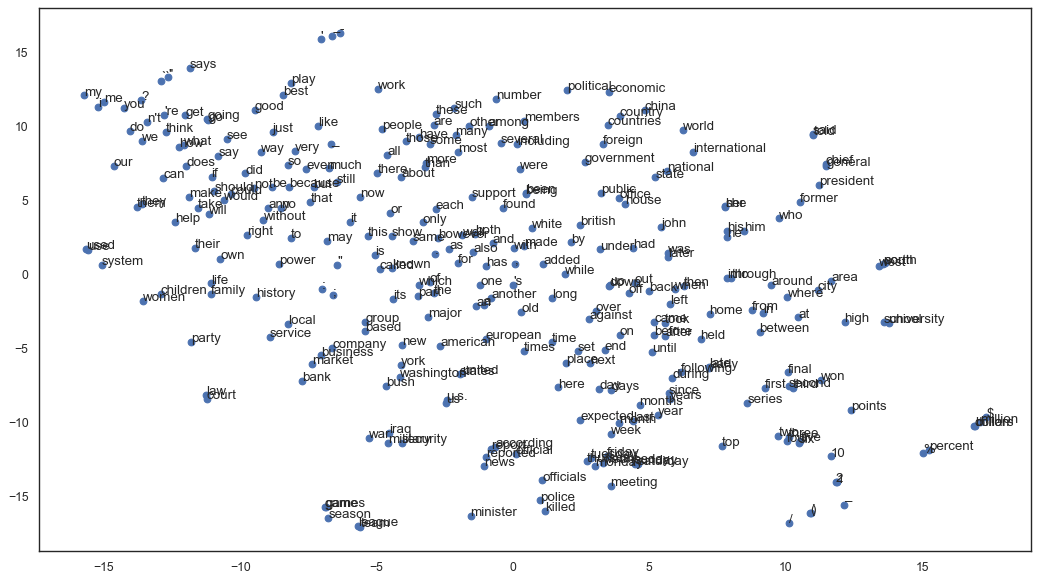

In [522]:
plt.figure(figsize=(16, 9), dpi=80)
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(tokens, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

C:\Users\roell\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\roell\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


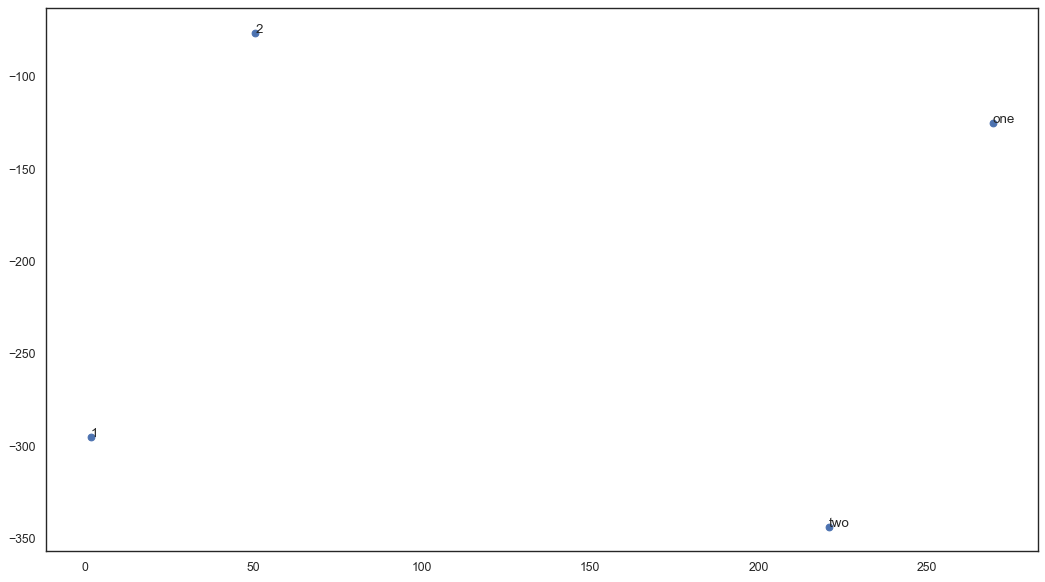

In [524]:
tokens = ["one", "1",  "two","2"]
vectors = [embeddings_dict[token] for token in tokens]

Y = tsne.fit_transform(vectors[:1000]);

plt.figure(figsize=(16, 9), dpi=80)
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(tokens, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')



### Visualizing Word2Vec Word Embeddings using t-SNE


To show you another method of accessing pre-trained word vectors we use `gensim`. (Example taken from : [https://github.com/sismetanin/word2vec-tsne](https://github.com/sismetanin/word2vec-tsne) )

In [ ]:
import gensim

In [3]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


The following loads the 300-dim Word2Vec embedding trained on Google news.

In [12]:
model_gn = gensim.downloader.load('word2vec-google-news-300');

In [6]:
model_gn.most_similar('twitter')

[('Twitter', 0.89089035987854),
 ('Twitter.com', 0.7536782026290894),
 ('tweet', 0.7431625723838806),
 ('tweeting', 0.7161932587623596),
 ('tweeted', 0.7137226462364197),
 ('facebook', 0.6988552808761597),
 ('tweets', 0.6974530220031738),
 ('Tweeted', 0.6950210928916931),
 ('Tweet', 0.6875007152557373),
 ('Tweeting', 0.6845166683197021)]

In [7]:
keys = ['Paris', 'Python', 'Sunday', 'Tolstoy', 'Twitter', 'bachelor', 'delivery', 'election', 'expensive',
        'experience', 'financial', 'food', 'iOS', 'peace', 'release', 'war']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_gn.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model_gn[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [13]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32);
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2);

C:\Users\roell\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\roell\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


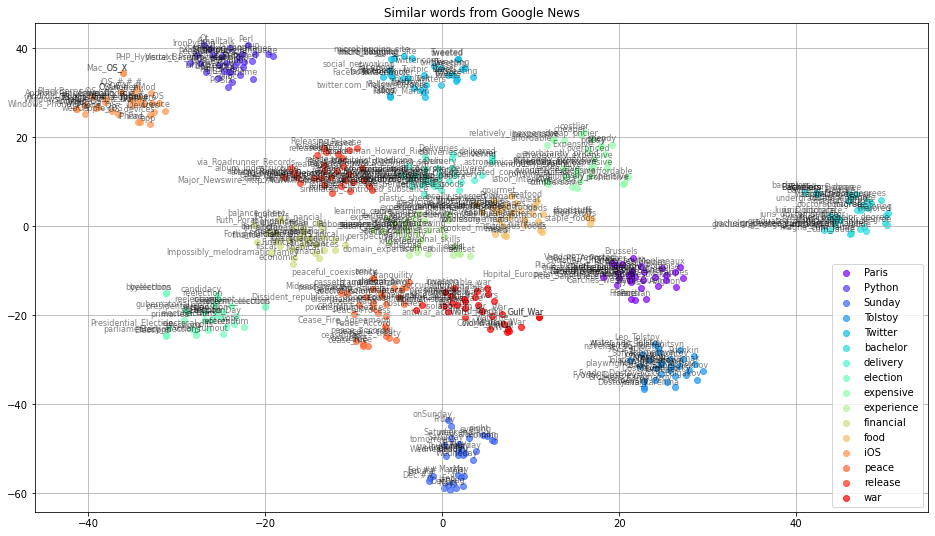

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm



def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, color=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

<div class="alert alert-block alert-warning">

#### Exercise
    
1. Plot the full corpus of *Time Machine* as 3-dim scatter plot.
2. Download another book from a different author and plot its corpus. Compare the two figures.
3. Plot different groups of words, e.g. fruits in contrast to occupations. (experiment with other examples).
4. Experiment with PCA. Plot the first 2 principal components fo some word clouds.

</div>